In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
X_train = np.load('X.npy')
y_train = np.load('y.npy')
len(X_train)

17736

In [3]:
#Shuffle the Array
shuffler = np.random.permutation(len(y_train))
X_train = X_train[shuffler]
y_train = y_train[shuffler]

In [4]:
ORIG_SHAPE = (256,256)
CROP_SIZE = (128,128)
IMG_SHAPE = (64,64)

In [5]:
from skimage.transform import resize
def get_image(x, x1,y1, shape, crop_size):
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    return x

In [6]:
#Reduce dimensions from 256,256 to 64,64
x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
x_t = []
for i in range(len(X_train)):
    x_t.append(get_image(X_train[i],x1,y1,IMG_SHAPE,CROP_SIZE))
del X_train

In [7]:
x_t = np.array(x_t)
y = y_train
del y_train

Text(0.5, 1.0, '6')

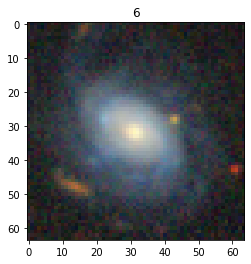

In [8]:
plt.imshow(x_t[0])
plt.title(y[0])

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
one = [['Disturbed Galaxies', 0],['Merging Galaxies',1],['Round Smooth Galaxies',2],['In-between Round Smooth Galaxies',3],['Cigar Shaped Smooth Galaxies',4],['Barred Spiral Galaxies',5],['Unbarred Tight Spiral Galaxies',6],['Unbarred Loose Spiral Galaxies',7],['Edge-on Galaxies without Bulge',8],['Edge-on Galaxies with Bulge',9]]
enc.fit(one)

OneHotEncoder(handle_unknown='ignore')

In [10]:
#OneHot Encoder
ytrain = np.zeros((len(y),10), np.int32)
i=0
for arr in ytrain:
    arr[y[i]] = 1
    i = i + 1
del y

In [11]:
import tensorflow as tf

Using TensorFlow backend.


In [12]:
#Creating a Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model = Sequential()
model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())


model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=[root_mean_squared_error])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 512)       14336     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 256)       1179904   
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 256)       1024      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       2

In [13]:
batch_size = 128
model.fit(x_t, ytrain, epochs=30, validation_data=(x_t,ytrain))

Epoch 1/30
555/555 [==============================] - 90s 155ms/step - loss: 0.3149 - root_mean_squared_error: 0.2999 - val_loss: 0.2734 - val_root_mean_squared_error: 0.2819
Epoch 2/30
555/555 [==============================] - 84s 151ms/step - loss: 0.2674 - root_mean_squared_error: 0.2798 - val_loss: 0.2397 - val_root_mean_squared_error: 0.2664
Epoch 3/30
555/555 [==============================] - 85s 153ms/step - loss: 0.2445 - root_mean_squared_error: 0.2684 - val_loss: 0.2190 - val_root_mean_squared_error: 0.2537
Epoch 4/30
555/555 [==============================] - 83s 149ms/step - loss: 0.2202 - root_mean_squared_error: 0.2542 - val_loss: 0.2313 - val_root_mean_squared_error: 0.2595
Epoch 5/30
555/555 [==============================] - 83s 149ms/step - loss: 0.2024 - root_mean_squared_error: 0.2433 - val_loss: 0.1882 - val_root_mean_squared_error: 0.2335
Epoch 6/30
555/555 [==============================] - 83s 149ms/step - loss: 0.1896 - root_mean_squared_error: 0.2346 - val_l

In [14]:
model.save("model_no_weights_17000.h5")
model.save_weights("model_weights_17000.h5")